In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [6]:
matplotlib.rc('font', **font)

In [7]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

### Combining two rounds opponents data sets

In [8]:
rnd_opp_files = ["../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_1.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_2.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_4.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_5.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_6.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_7.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_8.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_9.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponentslow_benefit_seed_10.csv"]

In [9]:
dfs = [pd.read_csv(file) for file in rnd_opp_files]

In [10]:
df = pd.concat(dfs)

In [11]:
df.to_csv("../data/clean_two_rounds_opponents.csv")

In [19]:
in_columns = [
    "y",
    "p",
    "q",
    "average cooperation rate",
    "average score",
    "t",
]


In [12]:
files = ["../data/clean_expected.csv", 
         "../data/last-round/clean_last_round.csv",
         "../data/clean_two_opponents.csv",
         "../data/clean_sixteen_states_two_rounds.csv",
         "../data/clean_two_rounds_opponents.csv"]

In [65]:
df = pd.read_csv("../data/clean_two_rounds_new.csv")

In [66]:
df

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.00000,0.00000,0.000000,0.00000,0.0000,0.0,1416.0
1,0.61630,0.66936,0.037202,0.10207,1.8373,1416.0,7.0
2,0.88263,0.43744,0.834960,0.59632,10.7340,1423.0,17.0
3,0.29574,0.07468,0.293710,0.24047,4.3285,1440.0,58.0
4,0.55888,0.22585,0.104520,0.11899,2.1419,1498.0,184.0
...,...,...,...,...,...,...,...
36094,0.18493,0.98489,0.923340,0.98148,17.6670,9991100.0,0.0
36095,0.13535,0.32320,0.612670,0.47409,8.5336,9991100.0,0.0
36096,0.17604,0.93137,0.134080,0.65798,11.8440,9991100.0,0.0
36097,0.38035,0.98679,0.213840,0.93775,16.8800,9991100.0,400.0


In [67]:
df = pd.read_csv("../data/clean_two_rounds_new.csv")

In [68]:
df

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.00000,0.00000,0.000000,0.00000,0.0000,0.0,1416.0
1,0.61630,0.66936,0.037202,0.10207,1.8373,1416.0,7.0
2,0.88263,0.43744,0.834960,0.59632,10.7340,1423.0,17.0
3,0.29574,0.07468,0.293710,0.24047,4.3285,1440.0,58.0
4,0.55888,0.22585,0.104520,0.11899,2.1419,1498.0,184.0
...,...,...,...,...,...,...,...
36094,0.18493,0.98489,0.923340,0.98148,17.6670,9991100.0,0.0
36095,0.13535,0.32320,0.612670,0.47409,8.5336,9991100.0,0.0
36096,0.17604,0.93137,0.134080,0.65798,11.8440,9991100.0,0.0
36097,0.38035,0.98679,0.213840,0.93775,16.8800,9991100.0,400.0


In [69]:
ps, qs = [], []
for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [70]:
sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies'])))



0.8538133174796608

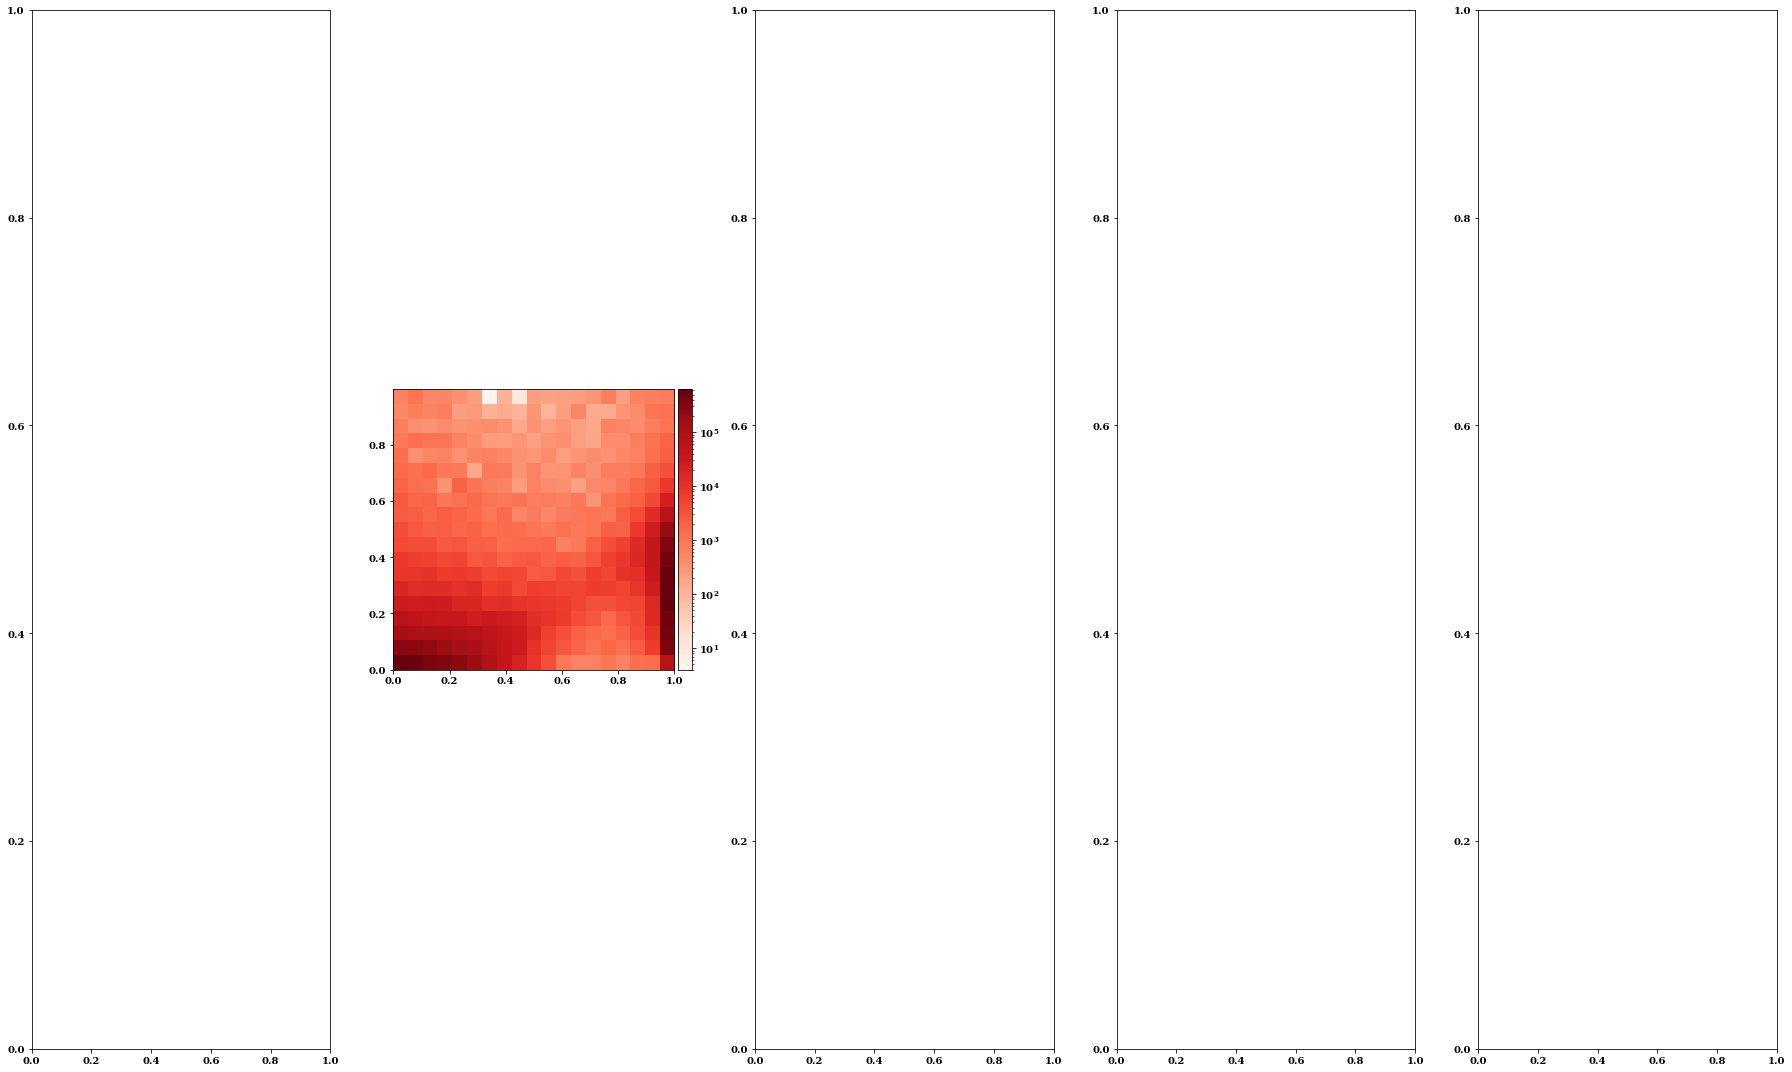

In [56]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))


i =1

im = axes[i].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[i],
                 norm=colors.LogNorm())

divider = make_axes_locatable(axes[i])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')


# axes[i].set_xticks(np.linspace(0, 1, 2))
# axes[i].set_yticks(np.linspace(0, 1, 2));
# axes[i].set_xlabel("$p$")
# axes[i].set_ylabel("$q$")

# axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

## Analysis of the evolved population

In [13]:
heatmaps = []
extents = []
dfs = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    dfs.append(df)

In [14]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [15]:
min_ = 1
max_ = 1391629.0

In [16]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

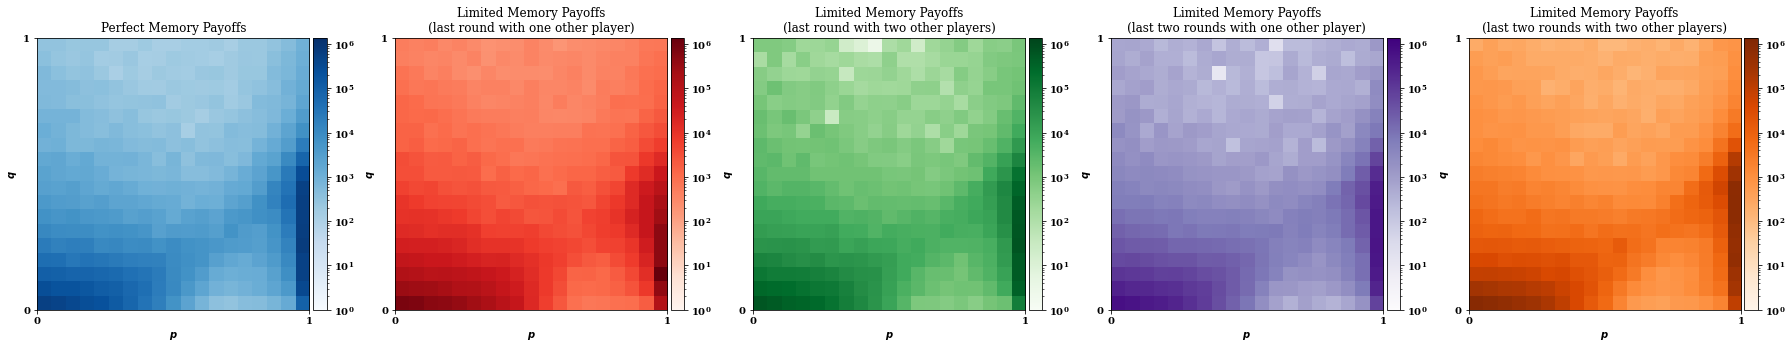

In [17]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [18]:
# fig, axes = plt.subplots(figsize=(15, 6.5));

# height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in dfs]

# x_pos = np.arange(len(titles))

# axes.bar(x_pos, height, width=0.4, color=bar_colors);

# axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

# axes.set_ylim(0, 1);
# axes.set_xticks([0, 1, 2, 3, 4]);
# axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10, rotation=15);

# for j, pos in enumerate([0, 1, 2, 3, 4]):
#     axes.text(pos,
#           height[j] + 0.05,
#           f"{round(height[j] * 100, 2)} %",
#           horizontalalignment='center',
#           color="black",
#           weight='bold',
#           fontsize=12
#       )

In [19]:
rnd_opp_files = ["../data/two-rounds-opponents/clean_two_rounds_opponents_seed_1.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_2.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_3.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_4.csv",    
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_5.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_6.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_7.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_8.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_9.csv",
                 "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_10.csv"]        

In [20]:
dfs = [pd.read_csv(file) for file in rnd_opp_files]

In [21]:
df = pd.concat(dfs)

In [22]:
df.to_csv("../data/clean_two_rounds_opponents_high_benefit.csv")

In [23]:
files = ["../data/clean_expected_b_10.csv", 
         "../matlab/data/stochastic/clean_c_1_b_10_stochastic_1.csv",
         "../data/clean_two_opponents_b_10.csv",
         "../data/clean_two_rounds_b_10.csv",
         "../data/two-rounds-opponents/clean_two_rounds_opponents_seed_2.csv"]

In [24]:
heatmaps = []
extents = []
dfs = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    dfs.append(df)

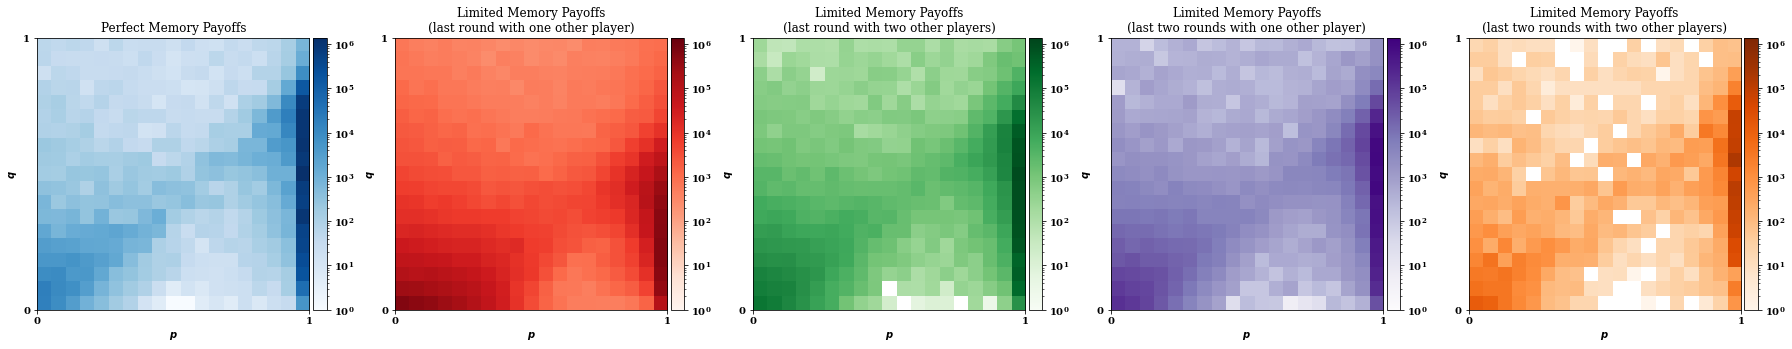

In [25]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [63]:
files = ["../data/clean_expected_b_10.csv", 
         "../data/last-round/clean_last_round_b_10.csv",
         "../data/clean_two_opponents_b_10.csv",
         "../data/clean_two_rounds_b_10.csv",
         "../data/clean_two_rounds_opponents_high_benefit.csv"]

In [64]:
dfs = [pd.read_csv(file) for file in files]

FileNotFoundError: [Errno 2] No such file or directory: '../data/clean_expected_b_3.csv'

In [9]:
bar_colors = [cmap(0.7) for cmap in cmaps]

In [10]:
bar_colors

[(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0),
 (0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0),
 (0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0),
 (0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0),
 (0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)]

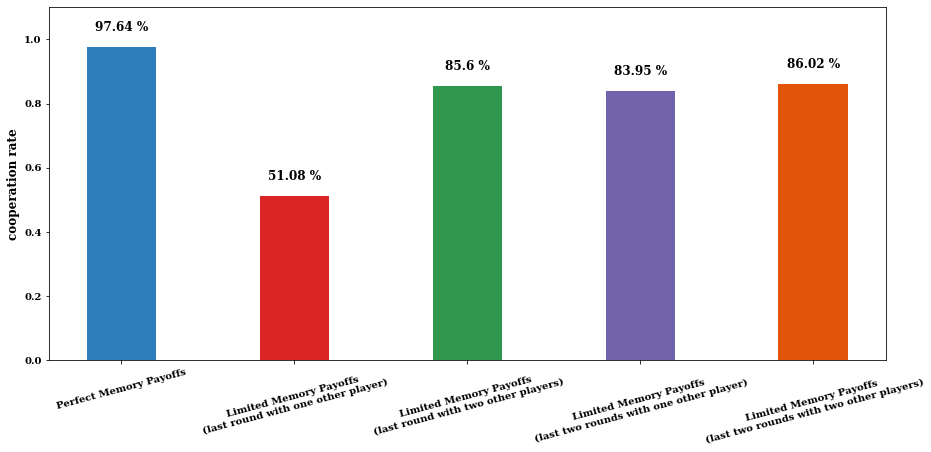

In [29]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10, rotation=15);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )
    
plt.savefig("../static/more_memory.pdf", bbox_inches='tight')